In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Convert word indices back to words (optional, for understanding)
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

In [5]:
# Preprocessing: Pad sequences to ensure equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_data = pad_sequences(train_data, maxlen=256)
test_data = pad_sequences(test_data, maxlen=256)

In [6]:
# Build the Deep Neural Network model
def build_model():
    model = keras.Sequential([
        layers.Embedding(10000, 16),  # Embedding layer for word vectors
        layers.GlobalAveragePooling1D(),  # Convert variable-length input to fixed-size
        layers.Dense(16, activation='relu'),  # Fully connected hidden layer
        layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Train the model
model = build_model()
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5535 - loss: 0.6914 - val_accuracy: 0.6574 - val_loss: 0.6825
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6921 - loss: 0.6776 - val_accuracy: 0.6994 - val_loss: 0.6553
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7394 - loss: 0.6457 - val_accuracy: 0.7750 - val_loss: 0.6091
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7814 - loss: 0.5946 - val_accuracy: 0.7976 - val_loss: 0.5476
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8078 - loss: 0.5300 - val_accuracy: 0.8160 - val_loss: 0.4881
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8317 - loss: 0.4675 - val_accuracy: 0.8402 - val_loss: 0.4377
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8488 - loss: 0.4172 - val_accuracy: 0.8480 - val_loss: 0.4013
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8633 - loss: 0.3759 - val_accuracy: 0.8562 - v

In [8]:
# 7. Train the model
model = build_model()
history = model.fit(train_data, train_labels, epochs=10, batch_size=512, validation_split=0.2, verbose=1)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5458 - loss: 0.6912 - val_accuracy: 0.7218 - val_loss: 0.6795
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7053 - loss: 0.6748 - val_accuracy: 0.7402 - val_loss: 0.6500
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7330 - loss: 0.6392 - val_accuracy: 0.7788 - val_loss: 0.5999
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7910 - loss: 0.5864 - val_accuracy: 0.7860 - val_loss: 0.5429
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8106 - loss: 0.5228 - val_accuracy: 0.8174 - val_loss: 0.4849
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8373 - loss: 0.4651 - val_accuracy: 0.8038 - val_loss: 0.4519
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8356 - loss: 0.4246 - val_accuracy: 0.8518 - val_loss: 0.4028
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8615 - loss: 0.3827 - val_accuracy: 0.8524 - v

In [9]:
# 8. Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
print(f'Test Accuracy: {test_acc:.2f}')

Test Accuracy: 0.87


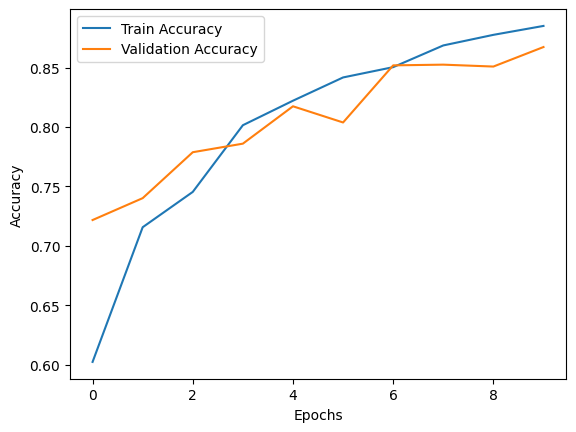

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
# Make predictions
predictions = model.predict(test_data[:5])
print("Sample Predictions:", predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Sample Predictions: [0.30610543 0.9464541  0.53550893 0.518571   0.8481466 ]
